In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("/kaggle/input/fortune-500/fortune500.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         500 non-null    int64 
 1   Company      500 non-null    object
 2   Industry     500 non-null    object
 3   Revenue ($)  500 non-null    object
 4    City        500 non-null    object
 5   State        500 non-null    object
 6   Zip          500 non-null    int64 
 7   Website      500 non-null    object
 8   Employees    500 non-null    object
 9   CEO          500 non-null    object
dtypes: int64(2), object(8)
memory usage: 39.2+ KB


,Rank,Zip
count,500.000000,500.000000
mean,250.500000,47829.520000
std,144.481833,30638.259507
min,1.000000,1104.000000
25%,125.750000,20004.500000
50%,250.500000,46236.000000
75%,375.250000,77002.000000
max,500.000000,98390.000000


In [8]:



df['Revenue ($)'] = pd.to_numeric(df['Revenue ($)'], errors='coerce')
df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce')



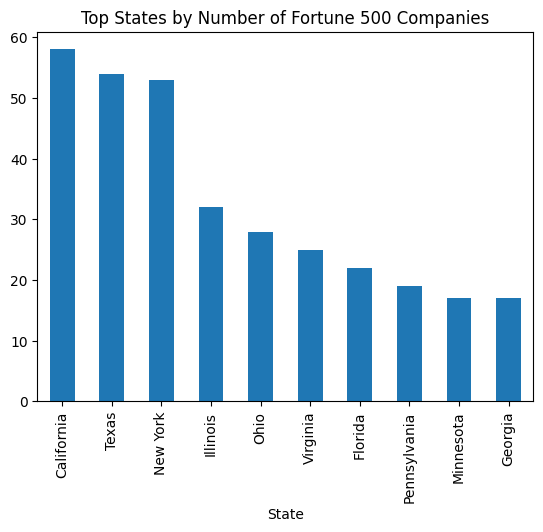

In [9]:
state_counts = df['State'].value_counts().head(10)

state_counts.plot(kind="bar")
plt.title("Top States by Number of Fortune 500 Companies")
plt.show()


In [10]:
le_industry = LabelEncoder()
le_state = LabelEncoder()

df['Industry_enc'] = le_industry.fit_transform(df['Industry'])
df['State_enc'] = le_state.fit_transform(df['State'])


In [11]:
X = df[['Rank', 'Employees', 'Industry_enc', 'State_enc']]
y = df['Revenue ($)']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [13]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9555217692163799
MAE: 2804784500.0
RMSE: 19874990214.275978
